<a href="https://colab.research.google.com/github/Susheel06/Data-crunch-hackathon/blob/master/Data_Crunch_Hackathon_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install pandas-profiling

In [ ]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import pandas.util.testing as tm

In [ ]:
train = pd.read_csv('train.csv')
print(train.shape)
train.head()

(60804, 18)


Loan.ID  Current.Loan.Amount  ... Tax.Liens  Loan.Status
0        0                17879  ...       0.0            1
1        1             99999999  ...       0.0            1
2        3             99999999  ...       0.0            1
3        4                11200  ...       0.0            1
4        5                 3608  ...       0.0            1

[5 rows x 18 columns]

In [ ]:
train.describe()

Loan.ID  Current.Loan.Amount  ...    Tax.Liens   Loan.Status
count  60804.000000         6.080400e+04  ...  60802.00000  60804.000000
mean   42094.538451         1.217772e+07  ...      0.02870      0.759457
std    24303.803897         3.268413e+07  ...      0.25697      0.427417
min        0.000000         4.910000e+02  ...      0.00000      0.000000
25%    21046.750000         8.167750e+03  ...      0.00000      1.000000
50%    42094.500000         1.424000e+04  ...      0.00000      1.000000
75%    63142.250000         2.402325e+04  ...      0.00000      1.000000
max    84189.000000         1.000000e+08  ...     15.00000      1.000000

[8 rows x 14 columns]

In [ ]:
# making a bool series 
bool_series = train['Loan.ID'].duplicated(keep = False) 
  
# bool series 
bool_series 
  
# passing NOT of bool series to see unique values only 
train = train[~bool_series] 

print(train.shape)

train.head()

(60804, 18)


Loan.ID  Current.Loan.Amount  ... Tax.Liens  Loan.Status
0        0                17879  ...       0.0            1
1        1             99999999  ...       0.0            1
2        3             99999999  ...       0.0            1
3        4                11200  ...       0.0            1
4        5                 3608  ...       0.0            1

[5 rows x 18 columns]

(array([53407.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7397.]),
 array([4.91000000e+02, 1.00004418e+07, 2.00003926e+07, 3.00003434e+07,
        4.00002942e+07, 5.00002450e+07, 6.00001958e+07, 7.00001466e+07,
        8.00000974e+07, 9.00000482e+07, 9.99999990e+07]),
 <a list of 10 Patch objects>)

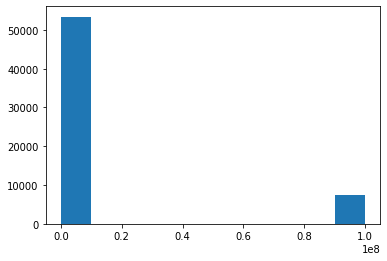

In [ ]:
# sns.set(style="whitegrid")
# sns.boxplot(x=train['Current.Loan.Amount'])

plt.hist(x=train['Current.Loan.Amount'])

Loan.ID  Current.Loan.Amount  ... Tax.Liens  Loan.Status
0        0             9.791382  ...       0.0            1
1        1            18.420681  ...       0.0            1
2        3            18.420681  ...       0.0            1
3        4             9.323669  ...       0.0            1
4        5             8.190909  ...       0.0            1

[5 rows x 18 columns]

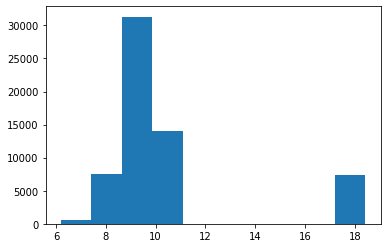

In [ ]:
train['Current.Loan.Amount'] = train['Current.Loan.Amount'].apply(np.log)
# sns.set(style="whitegrid")
# plt.figure()
# sns.boxplot(x=train['Current.Loan.Amount'])
plt.figure()
plt.hist(x=train['Current.Loan.Amount'])
train.head()

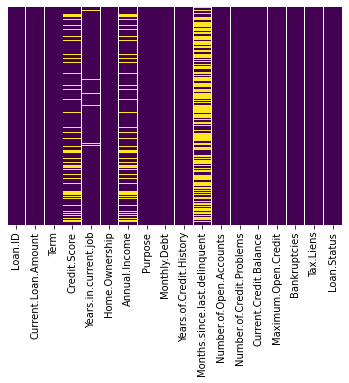

In [ ]:
plt.figure()
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
train.drop(['Months.since.last.delinquent'], axis=1, inplace=True)
train.shape

(60804, 17)

In [ ]:
print(np.mean(train['Credit.Score']))
mean_credit_score = np.mean(train['Credit.Score'])

y=train['Credit.Score']
train['Loan.ID'].tail()

# plt.scatter(x, y, linewidths=0.1)

1104.772331446217


60799    84184
60800    84185
60801    84186
60802    84187
60803    84189
Name: Loan.ID, dtype: int64

In [ ]:
train['Credit.Score'].fillna(mean_credit_score, inplace=True)

In [ ]:
train.dropna(subset=['Years.in.current.job'], inplace=True)

In [ ]:
train.shape

(58275, 17)

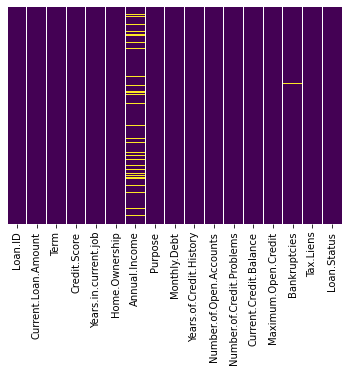

In [ ]:
plt.figure()
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

(58262, 17)


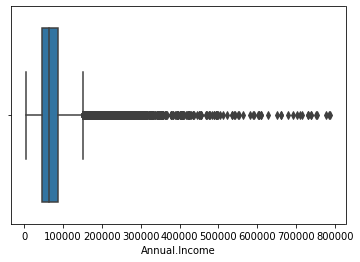

In [ ]:
indexNames = train[train['Annual.Income'] > 800000 ].index
train.drop(indexNames , inplace=True, axis=0)
print(train.shape)
sns.boxplot(x=train['Annual.Income'])

In [ ]:
mean_annual_income=np.mean(train['Annual.Income'])
train['Annual.Income'].fillna(mean_annual_income, inplace=True)

In [ ]:
mean_Bankruptcies=np.mean(train['Bankruptcies'])
train['Bankruptcies'].fillna(mean_Bankruptcies, inplace=True)

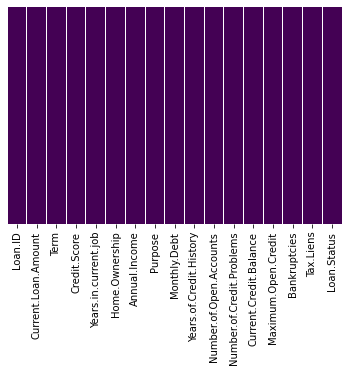

In [ ]:
plt.figure()
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

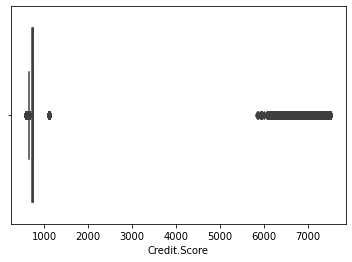

In [ ]:
sns.boxplot(x=train['Credit.Score'])


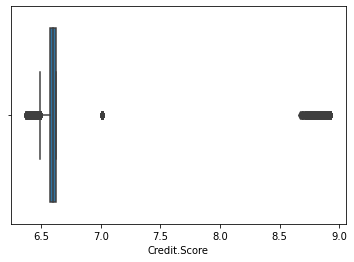

In [ ]:
train['Credit.Score'] = train['Credit.Score'].apply(np.log)
# plt.hist(x=train['Credit.Score'])

sns.boxplot(x=train['Credit.Score'])

(58262, 17)


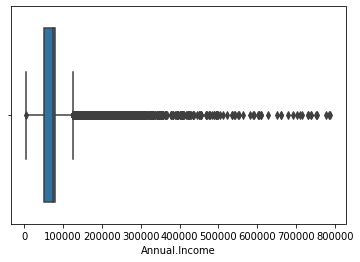

In [ ]:
print(train.shape)
sns.boxplot(x=train['Annual.Income'])
# len(train[train['Annual.Income'] == 0])
# sns.boxplot(x=train['Annual.Income'])
# print(train.shape)
# # for i in range(len(train)):
# #   if train['Annual.Income'].index[i] > 800000:
# #     train.drop(index=i, inplace=True, axis=0)

In [ ]:
# train['Gross.Monthly.Income'] = train['Gross.Monthly.Income'].apply(np.log)
# plt.figure()
# sns.boxplot(x=train['Gross.Monthly.Income'])

train.head()

Loan.ID  Current.Loan.Amount  ... Tax.Liens  Loan.Status
0        0             9.791382  ...       0.0            1
1        1            18.420681  ...       0.0            1
2        3            18.420681  ...       0.0            1
3        4             9.323669  ...       0.0            1
4        5             8.190909  ...       0.0            1

[5 rows x 17 columns]

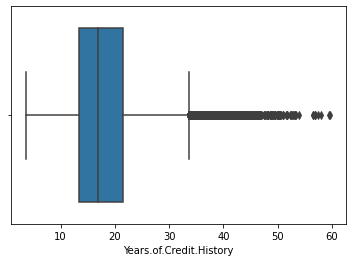

In [ ]:
sns.boxplot(x=train['Years.of.Credit.History'])
# len(train[train['Years.of.Credit.History']==0])

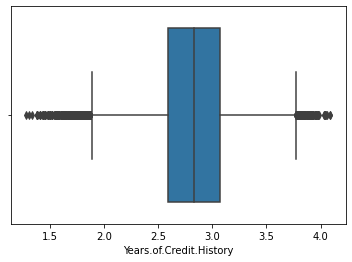

In [ ]:
train['Years.of.Credit.History'] = train['Years.of.Credit.History'].apply(np.log)
sns.boxplot(x=train['Years.of.Credit.History'])

In [ ]:
ac = train['Maximum.Open.Credit'].values-train['Current.Credit.Balance'].values
train.insert(15, column='Available.Credits', value=ac)
train.drop(columns=['Current.Credit.Balance', 'Maximum.Open.Credit'], axis=1, inplace=True)

train.head()

Loan.ID  Current.Loan.Amount  ... Tax.Liens  Loan.Status
0        0             9.791382  ...       0.0            1
1        1            18.420681  ...       0.0            1
2        3            18.420681  ...       0.0            1
3        4             9.323669  ...       0.0            1
4        5             8.190909  ...       0.0            1

[5 rows x 16 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder
X=train
categorical_feature_mask = X.dtypes==object

categorical_cols = X.columns[categorical_feature_mask].tolist()

le = LabelEncoder()
X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))+1
train = X

In [ ]:
train.head()

Loan.ID  Current.Loan.Amount  ...  Tax.Liens  Loan.Status
0        0             9.791382  ...        0.0            1
1        1            18.420681  ...        0.0            1
2        3            18.420681  ...        0.0            1
3        4             9.323669  ...        0.0            1
4        5             8.190909  ...        0.0            1

[5 rows x 16 columns]

In [ ]:
mean_annual_income=np.mean(train['Tax.Liens'])
train['Tax.Liens'].fillna(mean_annual_income, inplace=True)

In [ ]:
EMI = train['Current.Loan.Amount']/train['Term']
train.insert(0, column='EMI', value=EMI)
train.drop(columns=['Current.Loan.Amount', 'Term'], axis=1, inplace=True)

train.head()

EMI  Loan.ID  Credit.Score  ...  Available.Credits  Tax.Liens  Loan.Status
0   4.895691        0      6.605298  ...              16327        0.0            1
1  18.420681        1      6.428105  ...               8312        0.0            1
2   9.210340        3      6.603944  ...               1706        0.0            1
3   4.661835        4      6.603944  ...              14169        0.0            1
4   4.095454        5      6.594413  ...               2659        0.0            1

[5 rows x 15 columns]

In [ ]:
y_train = train['Loan.Status']

ID_train = train['Loan.ID']

train.drop(['Loan.Status', 'Loan.ID'], axis=1, inplace=True)
X_train = train

X_train.head()

EMI  Credit.Score  ...  Available.Credits  Tax.Liens
0   4.895691      6.605298  ...              16327        0.0
1  18.420681      6.428105  ...               8312        0.0
2   9.210340      6.603944  ...               1706        0.0
3   4.661835      6.603944  ...              14169        0.0
4   4.095454      6.594413  ...               2659        0.0

[5 rows x 13 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)

X_train.head()

EMI  Credit.Score  ...  Available.Credits  Tax.Liens
0 -0.591259     -0.332252  ...          -0.005907   -0.10977
1  3.822498     -0.685220  ...          -0.043304   -0.10977
2  0.816788     -0.334949  ...          -0.074126   -0.10977
3 -0.667576     -0.334949  ...          -0.015976   -0.10977
4 -0.852409     -0.353934  ...          -0.069679   -0.10977

[5 rows x 13 columns]

In [ ]:
# from sklearn.preprocessing import RobustScaler

# scaler = RobustScaler()
# scaler.fit(X_train)
# X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)

# X_train.head()

In [ ]:
np.isfinite(train).all()

EMI                          True
Credit.Score                 True
Years.in.current.job         True
Home.Ownership               True
Annual.Income                True
Purpose                      True
Monthly.Debt                 True
Years.of.Credit.History      True
Number.of.Open.Accounts      True
Number.of.Credit.Problems    True
Bankruptcies                 True
Available.Credits            True
Tax.Liens                    True
dtype: bool

In [ ]:
from sklearn.model_selection import train_test_split as tts

X_train, X_validation, y_train, y_validation = tts(X_train, y_train, train_size=0.75, test_size=0.25)

In [ ]:
X_train.head()

EMI  Credit.Score  ...  Available.Credits  Tax.Liens
22004 -0.570344     -0.324181  ...          -0.048973   -0.10977
29122  0.816788     -0.406394  ...          -0.036865   -0.10977
30904 -0.546215     -0.454533  ...           0.036477   -0.10977
42677 -0.872041     -0.389678  ...          -0.015029   -0.10977
24511  0.816788     -0.302819  ...          -0.012701   -0.10977

[5 rows x 13 columns]

In [ ]:
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.feature_selection import SelectFromModel
# print(X_train.shape)
# clf = ExtraTreesClassifier(n_estimators=50)
# clf = clf.fit(X_train, y_train)
# col = clf.feature_importances_ 
# model = SelectFromModel(clf, prefit=True)
# feature_idx = model.get_support()
# feature_name = X_train.columns[feature_idx]
# X_train = pd.DataFrame(model.transform(X_train), columns=feature_name)
# print(X_train.shape)   
# X_train.head()

In [ ]:
# X_validation = X_validation.loc[:, feature_name]
# X_validation.head()

In [ ]:
# import imblearn
# from imblearn.under_sampling import RandomUnderSampler
# import xgboost as xgb
# from sklearn.ensemble import RandomForestClassifier
# from sklearn import svm
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import VotingClassifier


# random_undersampler = RandomUnderSampler()
# X_res, y_res = random_undersampler.fit_sample(X_train, y_train)

# # Shuffle the data
# perms = np.random.permutation(X_res.shape[0])
# X_res = X_res[perms]
# y_res = y_res[perms]

# # Define base learners
# xgb_clf = xgb.XGBClassifier(objective="binary:logistic",
#                             learning_rate=0.03,
#                             n_estimators=500,
#                             max_depth=1,
#                             subsample=0.4,
#                             random_state=123)
# svm_clf = svm.SVC(gamma=0.1,
#               C=0.01,
#               kernel="poly",
#               degree=3,
#               coef0=10.0,
#               probability=True)
# rf_clf = RandomForestClassifier(n_estimators=300,
#                                 max_features="sqrt",
#                                 criterion="gini",
#                                 min_samples_leaf=5,
#                                 class_weight="balanced")

# # Define meta-learner
# logreg_clf = LogisticRegression(penalty="l2", C=100, fit_intercept=True)
# # Fitting voting clf --> average ensemble
# voting_clf = VotingClassifier([("xgb", xgb_clf),
#                                ("svm", svm_clf),
#                                ("rf", rf_clf)],
#                               voting="soft",
#                               flatten_transform=True)
# voting_clf.fit(X_res, y_res)

In [ ]:
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import FunctionTransformer
# from sklearn.model_selection import cross_val_predict

# xgb_model, svm_model, rf_model = voting_clf.estimators_
# models = {"xgb": xgb_model,
#           "svm": svm_model,
#           "rf": rf_model,
#           "avg_ensemble": voting_clf}

# # Build first stack of base learners
# first_stack = make_pipeline(voting_clf, FunctionTransformer(lambda X: X[:, 1::2]))

# # Use CV to generate meta-features
# meta_features = cross_val_predict(first_stack, X_res, y_res, cv=10, method="transform")

# # Refit the first stack on the full training set
# first_stack.fit(X_res, y_res)

# # Fit the meta learner
# second_stack = logreg_clf.fit(meta_features, y_res)


In [ ]:
# stacked_probs = second_stack.predict(first_stack.transform(X_train.values))
# stacked_probs
# stacked_auc_score = roc_auc_score(y_validation.values, stacked_probs)

In [ ]:
# from sklearn.neural_network import MLPClassifier
# clf = MLPClassifier(solver='adam', activation='tanh', alpha=0.0001, max_iter=10000, hidden_layer_sizes=(150,150,50), random_state=1)
# clf.fit(X_train, y_train)

In [ ]:
# from sklearn.naive_bayes import GaussianNB

# model = GaussianNB()
# model.fit(X_train, y_train)

In [ ]:
# import tensorflow as tf

# model = tf.keras.Sequential([
#             tf.keras.layers.Flatten(),
#             tf.keras.layers.Dense(100, activation='relu'),
#             tf.keras.layers.Dense(100, activation='relu'),
#             tf.keras.layers.Dense(50, activation='relu'),
#             tf.keras.layers.Dropout(0.5),
#             tf.keras.layers.Dense(2, activation='softmax')
# ])

# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy']
#               )

# history=model.fit(
#   X_train,
#   y_train,
#   steps_per_epoch=10000,
#   epochs=50,
#   validation_data=(X_validation, y_validation)
#   )


# model.summary()

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier

# model = KNeighborsClassifier(n_neighbors=2, metric='minkowski', weights='distance')

# model.fit(X_train, y_train)

In [ ]:
# from sklearn import svm

# model = svm.SVC()
# model.fit(X_train, y_train)

In [ ]:
# from sklearn.ensemble import ExtraTreesClassifier

# model = ExtraTreesClassifier()
# model.fit(X_train,y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

# model = RandomForestClassifier(random_state = 1, max_depth = 15, n_estimators = 500, min_samples_split = 2, min_samples_leaf = 1)
model = LogisticRegression(penalty='elasticnet', solver='saga', multi_class='multinomial', max_iter=300, C=1, l1_ratio=0.8)
# sv = svm.SVC(kernel='poly', degree=3, C=1)

# model = VotingClassifier(estimators=([('svc', sv), ('dt', dtc), ('lr', lr)]), voting='hard')
model.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.8, max_iter=300,
                   multi_class='multinomial', n_jobs=None, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import RandomForestClassifier

# model = GradientBoostingClassifier(RandomForestClassifier(random_state = 1, max_depth = 15, n_estimators = 500, min_samples_split = 2, min_samples_leaf = 1), n_estimators=40, learning_rate=0.1)
# model = GradientBoostingClassifier(DecisionTreeClassifier())
# model.fit(X_train, y_train)

In [ ]:
# from sklearn.naive_bayes import BernoulliNB
# multiNB = BernoulliNB(binarize=0.1)

# model = multiNB.fit(X_train, y_train)

In [ ]:
# from sklearn.model_selection import GridSearchCV

# n_estimators = [100, 300, 500, 800, 1200]
# max_depth = [5, 8, 15, 25, 30]
# min_samples_split = [2, 5, 10, 15, 100]
# min_samples_leaf = [1, 2, 5, 10] 

# hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
#               min_samples_split = min_samples_split, 
#              min_samples_leaf = min_samples_leaf)

# gridF = GridSearchCV(RandomForestClassifier(random_state = 1, max_depth = 15, n_estimators = 500, min_samples_split = 2, min_samples_leaf = 1), hyperF, cv = 3, verbose = 1, n_jobs = -1)
# model = gridF.fit(X_train, y_train)

In [ ]:
# N = 20
# plt.style.use("ggplot")
# plt.figure()
# plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
# plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
# plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
# plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
# plt.title("Training Loss and Accuracy")
# plt.xlabel("Epoch #")
# plt.ylabel("Loss/Accuracy")
# plt.legend(loc="lower left")

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

Y_predict_training = model.predict(X_train)
# stacked_probs = second_stack.predict(first_stack.transform(X_validation.values))

In [ ]:
# Y_predict_training=Y_predict_training+1
Y_predict_training

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
accuracy_score(y_train, Y_predict_training)
# y_train

0.810440314902966

In [ ]:
f1_score(y_train, Y_predict_training)

0.8894140265149998

In [ ]:
Y_predict_validation = model.predict(X_validation)
# stacked_probs = second_stack.predict(first_stack.transform(X_validation.values))
accuracy_score(y_validation, Y_predict_validation)

0.8108609089660854

In [ ]:
X_train.shape

(43696, 13)

(23386, 15)


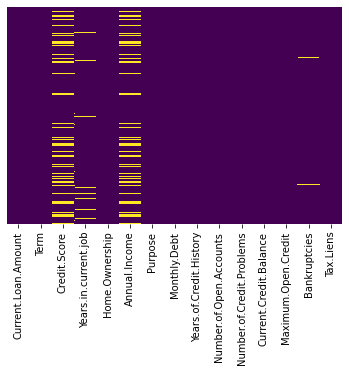

In [ ]:
test = pd.read_csv('test.csv')

ID_test = test['Loan.ID']
test.drop(['Months.since.last.delinquent', 'Loan.ID', 'Loan.Status'], axis=1, inplace=True)

print(test.shape)

plt.figure()
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

(23386, 15)


Current.Loan.Amount        Term  ...  Bankruptcies Tax.Liens
0                 6966  Short Term  ...           0.0       0.0
1                 9848  Short Term  ...           0.0       0.0
2             99999999  Short Term  ...           0.0       0.0
3                 6737  Short Term  ...           0.0       0.0
4                 5878  Short Term  ...           0.0       0.0

[5 rows x 15 columns]

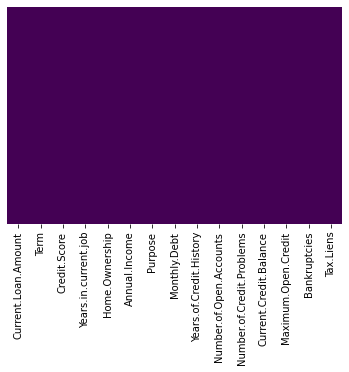

In [ ]:
mean_Bankruptcies=np.mean(test['Credit.Score'])
test['Credit.Score'].fillna(mean_Bankruptcies, inplace=True)

mean_Bankruptcies=np.mean(test['Bankruptcies'])
test['Bankruptcies'].fillna(mean_Bankruptcies, inplace=True)

mean_Bankruptcies=np.mean(test['Tax.Liens'])
test['Tax.Liens'].fillna(mean_Bankruptcies, inplace=True)

mean_Bankruptcies=np.mean(test['Annual.Income'])
test['Annual.Income'].fillna(mean_Bankruptcies, inplace=True)

test['Years.in.current.job'].fillna(test['Years.in.current.job'].mode()[0], inplace=True)

plt.figure()
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

print(test.shape)
test.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
X=test
categorical_feature_mask = X.dtypes==object

categorical_cols = X.columns[categorical_feature_mask].tolist()

le = LabelEncoder()
X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))+1
test = X

test.head()

Current.Loan.Amount  Term  ...  Bankruptcies  Tax.Liens
0                 6966     2  ...           0.0        0.0
1                 9848     2  ...           0.0        0.0
2             99999999     2  ...           0.0        0.0
3                 6737     2  ...           0.0        0.0
4                 5878     2  ...           0.0        0.0

[5 rows x 15 columns]

In [ ]:
# gross_monthly_income = (test['Annual.Income']/12)-test['Monthly.Debt']
# test.insert(6, column='Gross.Monthly.Income', value=gross_monthly_income)
# test.drop(columns=['Monthly.Debt', 'Annual.Income'], axis=1, inplace=True)

# test['Gross.Monthly.Income'] = test['Gross.Monthly.Income'].apply(np.log)

In [ ]:
test['Current.Loan.Amount'] = test['Current.Loan.Amount'].apply(np.log)

test['Credit.Score'] = test['Credit.Score'].apply(np.log)

test['Annual.Income'] = test['Annual.Income'].apply(np.log)

test['Years.of.Credit.History'] = test['Years.of.Credit.History'].apply(np.log)

ac = test['Maximum.Open.Credit'].values-test['Current.Credit.Balance'].values
ac=ac+1
test.insert(15, column='Available.Credits', value=ac)
test.drop(columns=['Current.Credit.Balance', 'Maximum.Open.Credit'], axis=1, inplace=True)

test['Available.Credits'] = test['Available.Credits']+0.5
len(test[test['Available.Credits'] == 0 ])

test.head()

Current.Loan.Amount  Term  ...  Tax.Liens  Available.Credits
0             8.848796     2  ...        0.0              940.5
1             9.195024     2  ...        0.0             1612.5
2            18.420681     2  ...        0.0             3597.5
3             8.815370     2  ...        0.0             5016.5
4             8.678972     2  ...        0.0            53497.5

[5 rows x 14 columns]

In [ ]:
EMI = test['Current.Loan.Amount']/test['Term']
test.insert(0, column='EMI', value=EMI)
test.drop(columns=['Current.Loan.Amount', 'Term'], axis=1, inplace=True)

test.head()

EMI  Credit.Score  ...  Tax.Liens  Available.Credits
0  4.424398      6.511745  ...        0.0              940.5
1  4.597512      6.992630  ...        0.0             1612.5
2  9.210340      6.584791  ...        0.0             3597.5
3  4.407685      6.992630  ...        0.0             5016.5
4  4.339486      6.610696  ...        0.0            53497.5

[5 rows x 13 columns]

In [ ]:
np.isfinite(test).all()

EMI                          True
Credit.Score                 True
Years.in.current.job         True
Home.Ownership               True
Annual.Income                True
Purpose                      True
Monthly.Debt                 True
Years.of.Credit.History      True
Number.of.Open.Accounts      True
Number.of.Credit.Problems    True
Bankruptcies                 True
Tax.Liens                    True
Available.Credits            True
dtype: bool

In [ ]:
scaler = StandardScaler()
scaler.fit(test)
X_test = pd.DataFrame(scaler.transform(test), columns=test.columns)

X_test.head()

EMI  Credit.Score  ...  Tax.Liens  Available.Credits
0 -0.731371     -0.516752  ...  -0.112406          -0.035549
1 -0.674488      0.458721  ...  -0.112406          -0.034596
2  0.841213     -0.368578  ...  -0.112406          -0.031783
3 -0.736862      0.458721  ...  -0.112406          -0.029772
4 -0.759272     -0.316031  ...  -0.112406           0.038936

[5 rows x 13 columns]

In [ ]:
Y_predict_test = model.predict(X_test)
Y_predict_test = Y_predict_test

In [ ]:
Y_predict_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
Y_test = pd.DataFrame({'Loan.ID': ID_test, 'Loan.Status': Y_predict_test})
Y_test.head(20)

Loan.ID  Loan.Status
0         2            1
1         6            1
2         9            1
3        12            1
4        14            1
5        20            1
6        24            0
7        27            1
8        30            1
9        32            1
10       38            1
11       42            1
12       45            1
13       48            1
14       50            1
15       56            1
16       60            1
17       63            1
18       66            1
19       68            1

In [ ]:
Y_test.to_csv('Submission.csv', header=True, index=False)